In [5]:
import torch
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import os
import cv2

In [28]:
input_dir = 'img/'

masks_dir = 'mask/'

input_paths = sorted([
                      os.path.join(input_dir, fname)
                      for fname in os.listdir(input_dir)
                      if fname.endswith(".png")
])

masks_paths = sorted([
                      os.path.join(masks_dir, fname)
                      for fname in os.listdir(masks_dir)
                      if fname.endswith(".png")
])

print(len(input_paths))
print(len(masks_paths))

50
50


In [29]:
images = []

for x in range (len(input_paths)):
  img = cv2.imread(input_paths[x])
  img = cv2.resize(img, (256,256))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img)

images = np.array(images)


In [30]:
print(masks_paths[0])

mask/drishtiGS_002_cupsegSoftmap.png


In [34]:
masks = []

for x in range (len(masks_paths)):
  img = cv2.imread(masks_paths[x])
  img = cv2.resize(img, (256,256))
  masks.append(img)

masks = np.array(images)


In [32]:
print(images.shape)

(50, 256, 256, 3)


In [35]:
print(masks.shape)

(50, 256, 256, 3)


In [12]:
class RetinaDataset(Dataset):
  
  def __init__(self, images, masks, root_dir, transform = None):
    self.images = images
    self.root_dir = root_dir
    self.masks = masks
    self.transform = transform
  
  def __len__(self):
    return len(self.images)
  
  def __getitem__(self, index):
    if torch.is_tensor(index):
      index = index.tolist()

    return self.images[index]


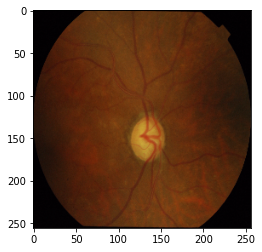

In [14]:
retina_dataset = RetinaDataset(images = images, root_dir = 'img/')

plt.imshow(retina_dataset[4])


In [ ]:
!pip install -U autoalbument

In [21]:
!autoalbument-create --config-dir config/ --task semantic_segmentation --num-classes 1


Files dataset.py and search.yaml are placed in config.

Next steps:
1. Add the required implementation for dataset methods in config/dataset.py
2. [Optional] Adjust search parameters in config/search.yaml
3. Run AutoAlbument search with the following command:

autoalbument-search --config-dir config



In [37]:
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning
import pytorch_lightning as pl

  Cloning https://github.com/PyTorchLightning/pytorch-lightning to /tmp/pip-req-build-n2jl3dla
  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-req-build-n2jl3dla
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 332 kB 31.8 MB/s 
  Created wheel for pytorch-lightning: filename=pytorch_lightning-1.6.0.dev0-py3-none-any.whl size=520157 sha256=019a8838f661e49b075a17a4d2b9a7e1a75dd5112137a7694fabd6d922431c61
  Stored in directory: /tmp/pip-ephem-wheel-cache-8jwk08j4/wheels/18/24/dd/8e13b7dfcda990eb2b099a57bb6d705f6d43fb53ecb4ed07bf
Successfully built pytorch-lightning
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
 

In [39]:
import collections.abc

In [51]:
!pip install torch

In [ ]:
!autoalbument-search --config-dir config/

/usr/local/lib/python3.7/dist-packages/autoalbument/cli/search.py:15: UserWarning: register_resolver() is deprecated.
See https://github.com/omry/omegaconf/issues/426 for migration instructions.

  OmegaConf.register_resolver("config_dir", get_config_dir)
/usr/local/lib/python3.7/dist-packages/hydra/core/default_element.py:126: UserWarning: In 'hydra/default': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/next/upgrades/1.0_to_1.1/changes_to_package_header for more information
  See {url} for more information"""
/usr/local/lib/python3.7/dist-packages/hydra/core/default_element.py:126: UserWarning: In 'logger/default': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/next/upgrades/1.0_to_1.1/changes_to_package_header for more information
  See {url} for more information"""
/usr/local/lib/python3.7/dist-packages/hydra/core/default_element.py:126: UserWarning: In 'callbacks/default': Usage of depre